<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Semana-2---Circuitos-divisores" data-toc-modified-id="Semana-2---Circuitos-divisores-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Semana 2 - Circuitos divisores</a></span><ul class="toc-item"><li><span><a href="#Carregamento-de-um-circuito-de-alimentação" data-toc-modified-id="Carregamento-de-um-circuito-de-alimentação-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Carregamento de um circuito de alimentação</a></span></li></ul></li><li><span><a href="#Exercícios" data-toc-modified-id="Exercícios-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exercícios</a></span><ul class="toc-item"><li><span><a href="#Exercício-1:" data-toc-modified-id="Exercício-1:-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Exercício 1:</a></span></li><li><span><a href="#Exercício-2:" data-toc-modified-id="Exercício-2:-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Exercício 2:</a></span></li></ul></li></ul></div>

In [ ]:
from IPython.core.display import HTML
from IPython.display import Image
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

# *Circuitos Elétricos I*

## Semana 2 - Circuitos divisores

### Carregamento de um circuito de alimentação

Quando uma fonte de tensão fornece energia a um dado elemento de circuito, diz-se que a fonte encontra-se *carregada*, ou que o elemento conectado à fonte é uma *carga* que está sendo alimentada pela fonte. De maneira geral, o carregamento de um circuito é o processo de introdução de elementos que extrairão corrente do circuito. Quanto maior for a  magnitude da corrente drenada, maior será o efeito de carregamento.

In [ ]:
Image("J3C0.png", width=300)

Da relação do divisor de tensão, temos que:

$$ \begin{align} v_x &= \frac{R_x}{R_{eq}}v_s = \frac{R_x}{R_x+R_y}v_s\\
                 v_y &= \frac{R_y}{R_{eq}}v_s = \frac{R_y}{R_x+R_y}v_s
    \end{align}$$
    
Ao conectar uma carga $R_L$ ao resistor $R_y$, temos que a tensão $v_y$ será dada por:

$$\begin{align} v_y &= \frac{(R_y||R_L)}{R_{eq}}v_s = \frac{(R_y||R_L)}{R_x+(R_y||R_L)}v_s\\ \\
                v_y &= \frac{\frac{R_yR_L}{R_y+R_L}}{R_x+\frac{R_yR_L}{R_y+R_L}}v_s = \frac{R_yR_L}{R_x(R_y+R_L)+R_yR_L}v_s = \frac{R_y}{R_x(\frac{R_y}{R_L}+1)+R_y}v_s
\end{align}$$


Note que, se $R_L >> R_y$, a tensão $v_y$ com a carga conectada aproxima-se da tensão obtida com os terminais em aberto.

In [ ]:
from pylab import *

# parâmetros do circuito
Vs = 15
Rx = 10
Ry = 20

# cálculo das tensões com o divisor de tensão carregado
# com uma carga RL
RL = arange(0,50000,10)
Vy = zeros(RL.shape)
Vx = zeros(RL.shape)
iL = zeros(RL.shape)

for ind in range(0, len(RL)):
    if RL[ind] == 0:
        Vy[ind] = 0
        iL[ind] = Vs/Rx
    else:
        Vy[ind] = (Ry/(Rx*(Ry/RL[ind]+1)+Ry))*Vs
        iL[ind] = Vy[ind]/RL[ind]
        
    Vx[ind] = Vs-Vy[ind]

figure(figsize=(12,5))
plot(RL, Vy,'-o', label='$v_y(R_L)$');
plot(RL, Vx,'-*' , label='$v_x(R_L)$');
hlines((Ry/(Rx+Ry))*Vs, RL.min(0),RL.max(0), label = '$v_y$');
hlines((Rx/(Rx+Ry))*Vs, RL.min(0),RL.max(0), label = '$v_x$');

legend()
xlabel('$R_L$ [Ω]')
ylabel('[V]')
grid()

figure(figsize=(12,4))
plot(RL, iL,'-o', label='$i_L(R_L)$');

legend()
xlabel('$R_L$ [Ω]')
ylabel('$i_L$ [A]')
grid()

Image("J3C0.png", width=300)

## Exercícios

### Exercício 1: 

a. No circuito abaixo, $V_s=$120 V, determine o valor das tensões nos terminais $a$, $b$ e $c$ indicados.

b. Determine o valor das tensões nos terminais indicados considerando que cada um deles alimenta uma carga de 20 $\Omega$.

In [ ]:
Image("J3C1.png", width=400)

### Exercício 2: 

Determine o valor de $R_1$, $R_2$ e $R_3$ no circuito divisor de tensão ilustrado na figura seguinte. O circuito pode ser projetado utilizando resistores de 2 W?

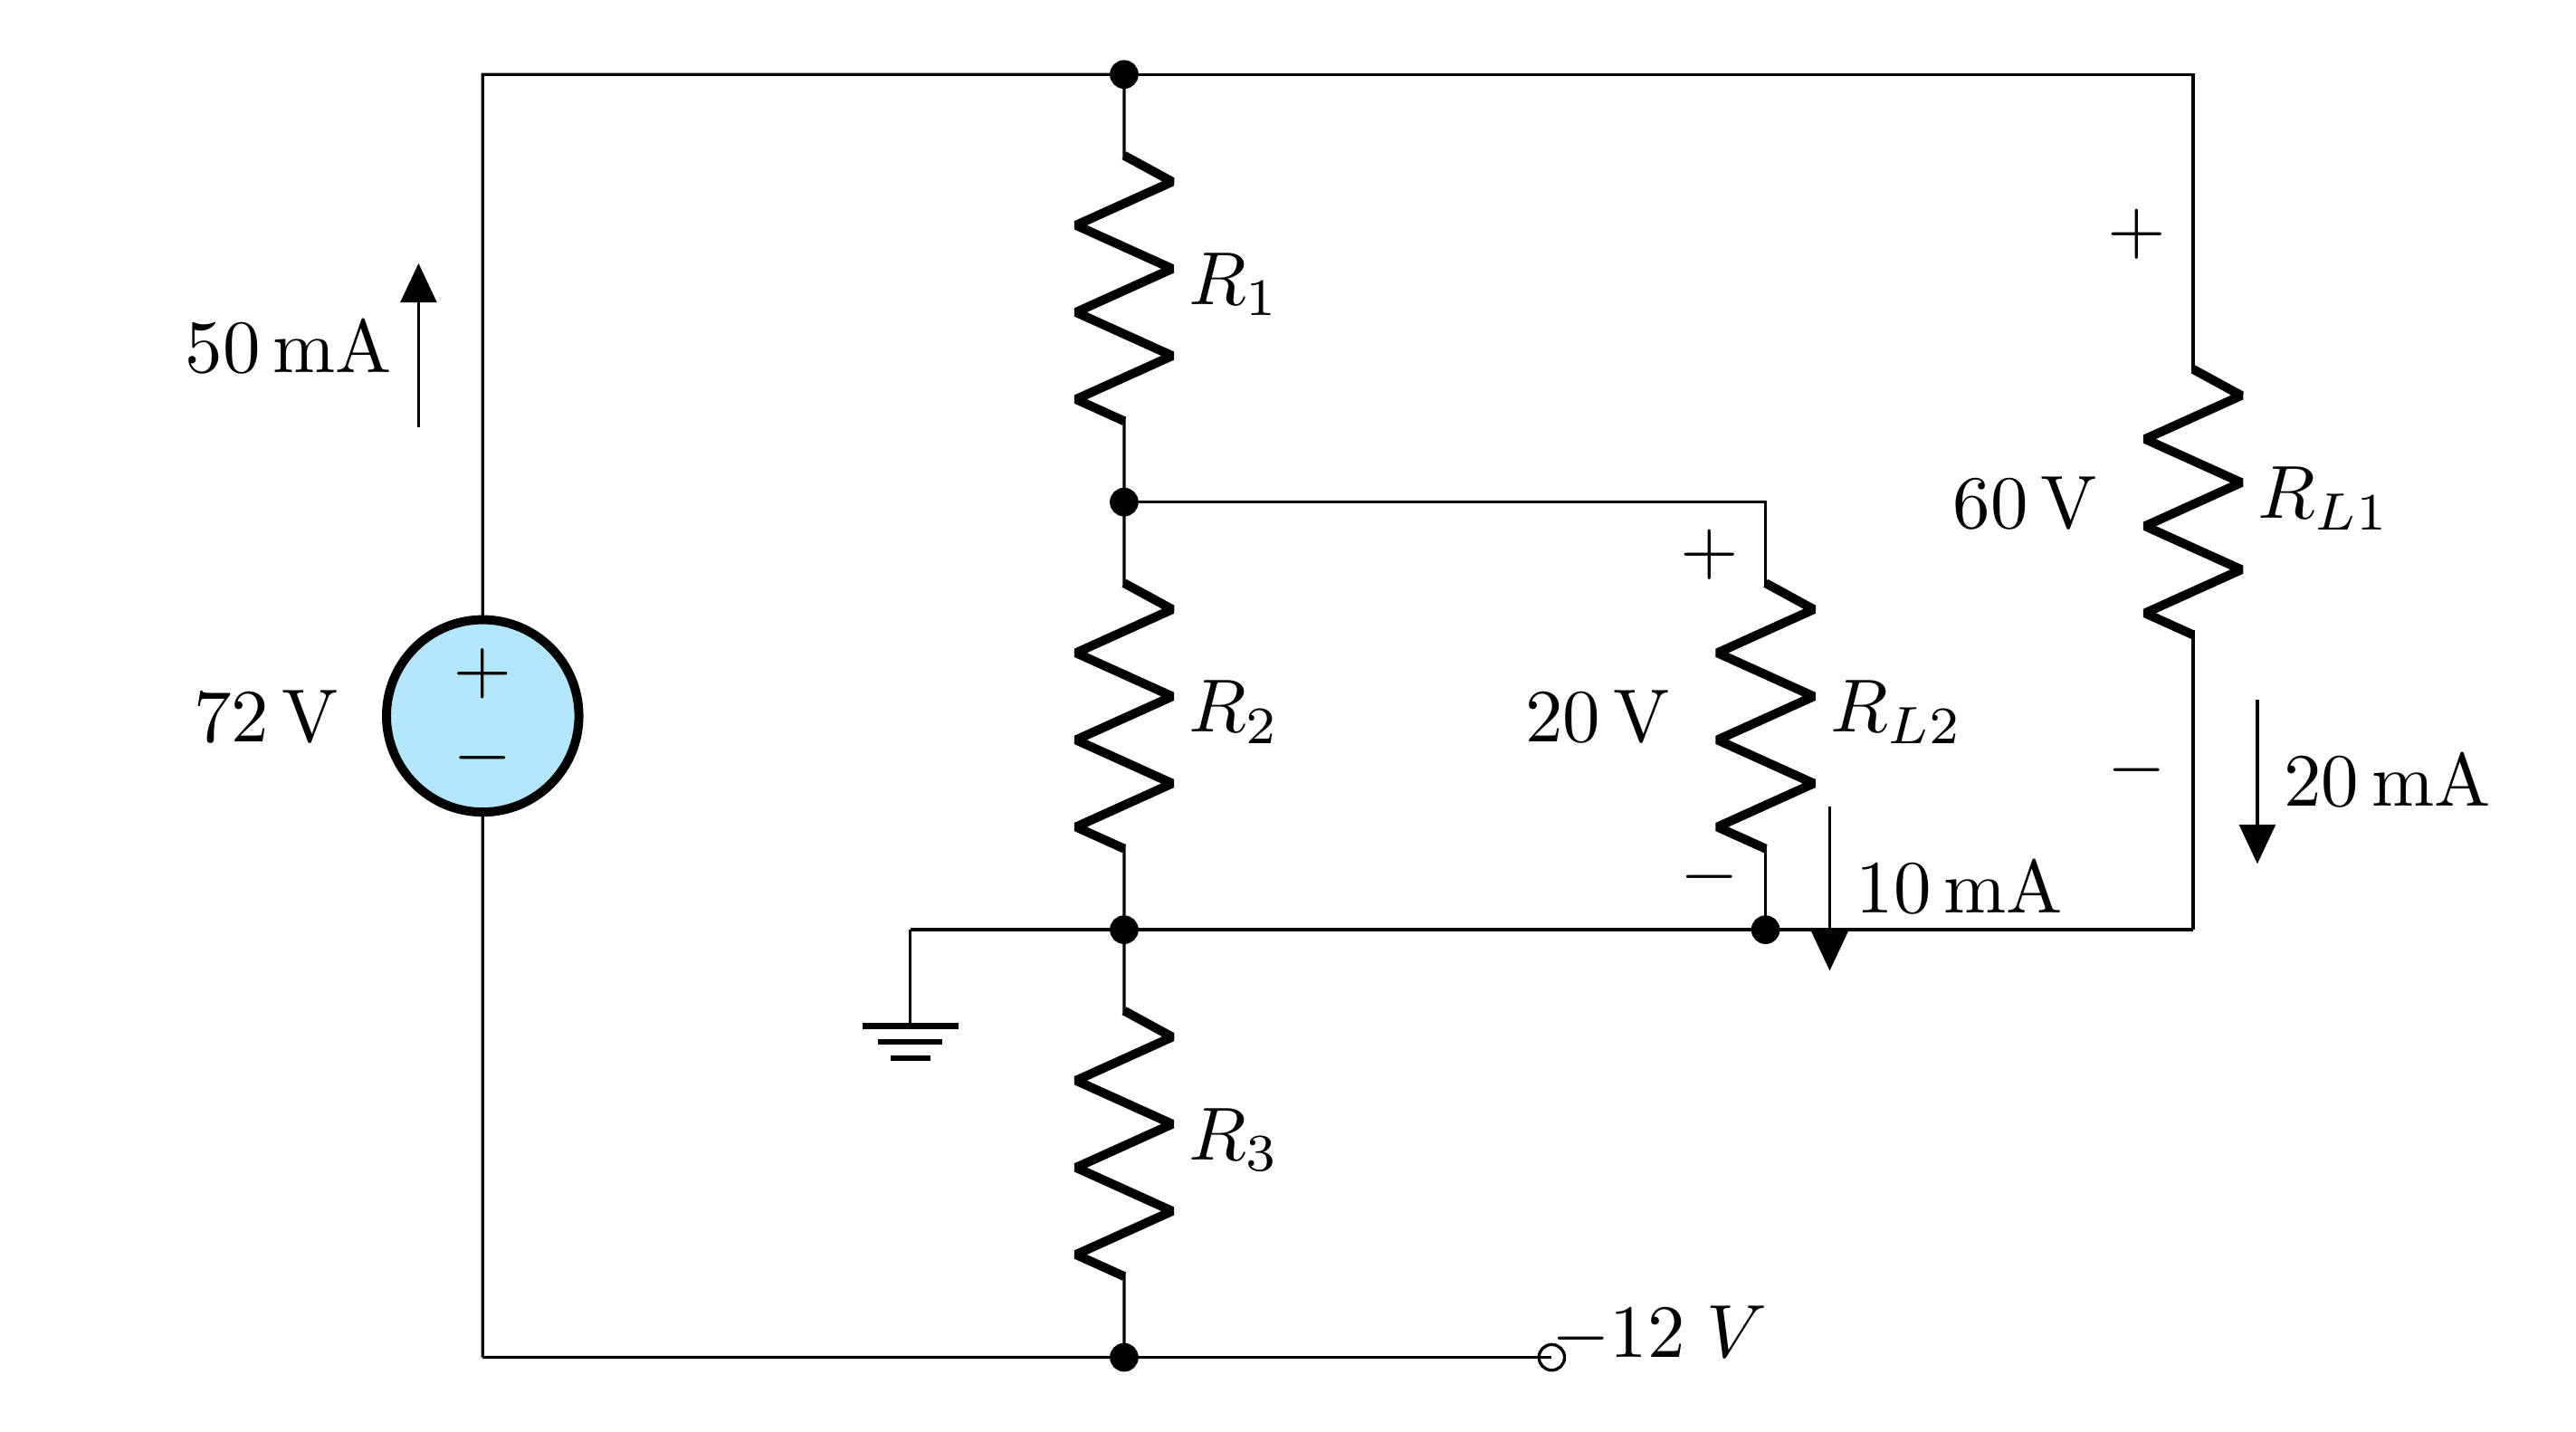

In [15]:
from IPython.display import Image
Image("J3C2.png", width=600)

In [ ]:
Image("J4C1.png", width=600)

In [16]:
def YΔ(R1,R2,R3):
    
    x = R1*R2+R2*R3+R3*R1
    Ra = x/R1
    Rb = x/R2
    Rc = x/R3
    
    return Ra, Rb, Rc

def ΔY(Ra,Rb,Rc):
    
    x = Ra+Rb+Rc
    R1 = (Rb*Rc)/x
    R2 = (Ra*Rc)/x
    R3 = (Rb*Ra)/x
    
    return R1, R2, R3

In [19]:
YΔ(3,1,2)

(3.6666666666666665, 11.0, 5.5)

In [22]:
ΔY(3.6666666666666,11,5.5)

(3.0000000000000098, 0.999999999999985, 1.99999999999997)